In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# %cd /content/drive/MyDrive/

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11479180802152409627
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1745276110
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12783113121029442552
 physical_device_desc: "device: 0, name: NVIDIA RTX A2000 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [4]:
import torch
print(torch.cuda.is_available())

True


In [5]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [6]:
import chainer
chainer.print_runtime_info()

C:\ProgramData\Anaconda3\lib\site-packages\pkg_resources\__init__.py:123: PkgResourcesDeprecationWarning: ghtgbm is an invalid version and will not be supported in a future release
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\pkg_resources\__init__.py:123: PkgResourcesDeprecationWarning: 4.0.0-unsupported is an invalid version and will not be supported in a future release
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\chainer\_environment_check.py:72: UserWarning: 
--------------------------------------------------------------------------------
CuPy (cupy-cuda116) version 10.3.1 may not be compatible with this version of Chainer.
Please consider installing the supported version by running:
  $ pip install 'cupy-cuda116>=7.7.0,<8.0.0'

See the following page for more details:
  https://docs.cupy.dev/en/latest/install.html
--------------------------------------------------------------------------------

  warnings.warn(msg.format(


Platform: Windows-10-10.0.19043-SP0
Chainer: 7.8.1
ChainerX: Not Available
NumPy: 1.20.3
CuPy:
  OS                           : Windows-10-10.0.19043-SP0
  Python Version               : 3.9.7
  CuPy Version                 : 10.3.1
  CuPy Platform                : NVIDIA CUDA
  NumPy Version                : 1.20.3
  SciPy Version                : 1.7.1
  Cython Build Version         : 0.29.28
  Cython Runtime Version       : 0.29.24
  CUDA Root                    : C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.6
  nvcc PATH                    : C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.6\bin\nvcc.EXE
  CUDA Build Version           : 11060
  CUDA Driver Version          : 11060
  CUDA Runtime Version         : 11060
  cuBLAS Version               : 110902
  cuFFT Version                : 10701
  cuRAND Version               : 10209
  cuSOLVER Version             : (11, 3, 4)
  cuSPARSE Version             : 11702
  NVRTC Version                : (11, 3)
  Thrust 

In [7]:
import torch
print(torch.__version__)

1.11.0+cu113


In [8]:
# PyTorchでGPUが使用可能か確認: torch.cuda.is_available()
print(torch.cuda.is_available())

True


In [9]:
# PyTorchで使用できるGPU（デバイス）数の確認: 
print(torch.cuda.device_count())

1


In [10]:
# GPUの名称、CUDA Compute Capabilityを取得
print(torch.cuda.get_device_name())

NVIDIA RTX A2000 Laptop GPU


In [11]:
print(torch.cuda.get_device_capability())

(8, 6)


# home-credit-risk(003)

In [12]:
import pandas as pd
#import pandas_profiling
import numpy as np
import cupy as cp
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import roc_auc_score
from sklearn.tree import plot_tree

from six import StringIO

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import math
from scipy import stats
import numpy as np
import optuna.integration.lightgbm as lgb
import pandas as pd
import tensorflow as tf

from datetime import datetime
from tensorflow import feature_column
from tensorflow.keras import layers

print("OK\n")

OK



## データ読み込み

In [13]:
application_train_origin = pd.read_csv('./home-credit-default-risk/application_train.csv')
application_test_origin =  pd.read_csv('./home-credit-default-risk/application_test.csv')
bureau_origin = pd.read_csv('./home-credit-default-risk/bureau.csv')
bureau_balance_origin = pd.read_csv('./home-credit-default-risk/bureau_balance.csv')
#POS_CASH_balance_origin = pd.read_csv('./home-credit-default-risk/POS_CASH_balance.csv')
#credit_card_balance_origin = pd.read_csv('./home-credit-default-risk/credit_card_balance.csv')
#previous_application_origin = pd.read_csv('./home-credit-default-risk/previous_application.csv')
#installments_payments_origin = pd.read_csv('./home-credit-default-risk/installments_payments.csv')
# custo data
app_br_train_origin = pd.read_csv('./home-credit-default-risk/datasets/app_train_Loan_From_other_banks_cash-consumer-loans.csv')
app_br_test_origin = pd.read_csv('./home-credit-default-risk/datasets/app_test_Loan_From_other_banks_cash-consumer-loans.csv')
app_train_br_overdue_hist_origin = pd.read_csv('./home-credit-default-risk/datasets/app_train_br_overdue_hist.csv')
app_test_br_overdue_hist_origin = pd.read_csv('./home-credit-default-risk/datasets/app_test_br_overdue_hist.csv')
app_train_br_debt_credit_ratio_none_origin = pd.read_csv('./home-credit-default-risk/datasets/app_train_br_debt_credit_ratio_none.csv')
app_test_br_debt_credit_ratio_none_origin = pd.read_csv('./home-credit-default-risk/datasets/app_test_br_debt_credit_ratio_none.csv')

application_train_origin.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
app_train = application_train_origin.copy()
app_test = application_test_origin.copy()
bureau = bureau_origin.copy()
bureau_balance = bureau_balance_origin.copy()
#POS_CASH_balance = POS_CASH_balance_origin.copy()
#credit_card_balance = credit_card_balance_origin.copy()
#previous_application = previous_application_origin.copy()
#installments_payments = installments_payments_origin.copy()
#application_train.head()
app_br_train = app_br_train_origin.copy()
app_br_test = app_br_test_origin.copy()
app_train_br_overdue_hist = app_train_br_overdue_hist_origin.copy()
app_test_br_overdue_hist = app_test_br_overdue_hist_origin.copy()
app_train_br_debt_credit_ratio_none = app_train_br_debt_credit_ratio_none_origin.copy()
app_test_br_debt_credit_ratio_none = app_test_br_debt_credit_ratio_none_origin.copy()

## 他金融機関での借り入れ情報(bureau)前処理

In [15]:
len(app_train)

307511

In [16]:
len(app_test)

48744

In [17]:
len(app_br_train)

87829

In [18]:
len(app_br_test)

42000

In [19]:
len(app_train_br_overdue_hist)

307511

In [20]:
len(app_test_br_overdue_hist)

48744

In [21]:
# 
app_train['credit_annuity_ratio'] = app_train['AMT_CREDIT']/app_train['AMT_ANNUITY']
app_test['credit_annuity_ratio'] = app_train['AMT_CREDIT']/app_test['AMT_ANNUITY']
# カテゴリ変数へ変換
app_train['REGION_POPULATION_RELATIVE'] = pd.cut(app_train['REGION_POPULATION_RELATIVE'], bins=20, labels=False)
app_test['REGION_POPULATION_RELATIVE'] =  pd.cut(app_test['REGION_POPULATION_RELATIVE'], bins=20, labels=False)


In [22]:
app_train['NAME_CONTRACT_TYPE'].replace(['Cash loans', 'Revolving loans'], [0, 1], inplace=True)
app_test['NAME_CONTRACT_TYPE'].replace(['Cash loans', 'Revolving loans'], [0, 1], inplace=True)

app_train['CODE_GENDER'].replace(['F', 'M', 'XNA'], [0, 1, 0], inplace=True)
app_test['CODE_GENDER'].replace(['F', 'M', 'XNA'], [0, 1, 0], inplace=True)

app_train['FLAG_OWN_CAR'].replace(['Y', 'N'], [1, 0], inplace=True)
app_test['FLAG_OWN_CAR'].replace(['Y', 'N'], [1, 0], inplace=True)

app_train['FLAG_OWN_REALTY'].replace(['Y', 'N'], [1, 0], inplace=True)
app_test['FLAG_OWN_REALTY'].replace(['Y', 'N'], [1, 0], inplace=True)

app_train['OCCUPATION_TYPE'].replace(['Laborers','Sales staff','Core staff','Managers','Drivers','High skill tech staff','Accountants','Medicine staff','Security staff','Cooking staff','Cleaning staff','Private service staff','Low-skill Laborers','Waiters/barmen staff','Secretaries','Realty agents','HR staff','IT staff'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], inplace=True)
app_test['OCCUPATION_TYPE'].replace(['Laborers','Sales staff','Core staff','Managers','Drivers','High skill tech staff','Accountants','Medicine staff','Security staff','Cooking staff','Cleaning staff','Private service staff','Low-skill Laborers','Waiters/barmen staff','Secretaries','Realty agents','HR staff','IT staff'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], inplace=True)

app_train['NAME_FAMILY_STATUS'].replace(['Married','Single / not married','Civil marriage','Separated','Widow','Unknown'], [0, 1, 2, 3, 4, 0], inplace=True)
app_test['NAME_FAMILY_STATUS'].replace(['Married','Single / not married','Civil marriage','Separated','Widow','Unknown'], [0, 1, 2, 3, 4, 0], inplace=True)

app_train['NAME_HOUSING_TYPE'].replace(['House / apartment','With parents','Municipal apartment','Rented apartment','Office apartment','Co-op apartment'], [0, 1, 2, 3, 4, 5], inplace=True)
app_test['NAME_HOUSING_TYPE'].replace(['House / apartment','With parents','Municipal apartment','Rented apartment','Office apartment','Co-op apartment'], [0, 1, 2, 3, 4, 5], inplace=True)

app_train['NAME_INCOME_TYPE'].replace(['Working','Commercial associate','Pensioner','State servant','Unemployed','Student','Businessman','Maternity leave'], [0, 1, 2, 3, 4, 5, 6, 7], inplace=True)
app_test['NAME_INCOME_TYPE'].replace(['Working','Commercial associate','Pensioner','State servant','Unemployed','Student','Businessman','Maternity leave'], [0, 1, 2, 3, 4, 5, 6, 7], inplace=True)

app_train['NAME_EDUCATION_TYPE'].replace(['Secondary / secondary special', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Academic degree'], [0, 1, 2, 3, 4], inplace=True)
app_test['NAME_EDUCATION_TYPE'].replace(['Secondary / secondary special', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Academic degree'], [0, 1, 2, 3, 4], inplace=True)

app_train['REGION_POPULATION_RELATIVE'] = pd.cut(app_train['REGION_POPULATION_RELATIVE'], bins=20, labels=False)
app_test['REGION_POPULATION_RELATIVE'] =  pd.cut(app_test['REGION_POPULATION_RELATIVE'], bins=20, labels=False)

app_train['credit_goods_price_ratio'] = app_train['AMT_CREDIT']/app_train['AMT_GOODS_PRICE']
app_test['credit_goods_price_ratio'] = app_test['AMT_CREDIT']/app_test['AMT_GOODS_PRICE']

app_train['credit_downpayment'] = app_train['AMT_GOODS_PRICE'] - app_train['AMT_CREDIT']
app_test['credit_downpayment'] = app_test['AMT_GOODS_PRICE'] - app_test['AMT_CREDIT']

app_train['AGE_INT'] = app_train['DAYS_BIRTH']/365
app_test['AGE_INT'] = app_test['DAYS_BIRTH']/365

app_train['AGE_INT'].astype('int')
app_test['AGE_INT'].astype('int')

#app_train['OCCUPATION_TYPE'].fillna(18, inplace=True)
#app_test['OCCUPATION_TYPE'].fillna(18, inplace=True)

app_train['CNT_FAM_MEMBERS'].fillna(app_train['CNT_FAM_MEMBERS'].median(), inplace=True)
app_test['CNT_FAM_MEMBERS'].fillna(app_train['CNT_FAM_MEMBERS'].median(), inplace=True)

#app_train['credit_goods_price_ratio'].fillna(0, inplace=True)
#app_test['credit_goods_price_ratio'].fillna(0, inplace=True)

#app_train['credit_downpayment'].fillna(0, inplace=True)
#app_test['credit_downpayment'].fillna(0, inplace=True)

#app_train['AGE_INT'].fillna(0, inplace=True)
#app_test['AGE_INT'].fillna(0, inplace=True)

#app_train['EXT_SOURCE_1'].fillna(0, inplace=True)
#app_test['EXT_SOURCE_1'].fillna(0, inplace=True)

#app_train['EXT_SOURCE_2'].fillna(0, inplace=True)
#app_test['EXT_SOURCE_2'].fillna(0, inplace=True)

#app_train['EXT_SOURCE_3'].fillna(0, inplace=True)
#app_test['EXT_SOURCE_3'].fillna(0, inplace=True)

### bureau.csv
|列名|内容|
|:----|:----|
|SK_ID_CURR|クライアントのローンID|
|SK_ID_BUREAU|ローン申し込み以前の他金融機関ローンのID|
|CREDIT_ACTIVE|他金融機関のローンの状態|
|CREDIT_CURRENCY|記録されている他金融機関のローンの通貨の種類|
|DAYS_CREDIT|申し込み日と他金融機関のローンがこの信用情報機関に登録された日数の差|
|CREDIT_DAY_OVERDUE|申し込み時点での他金融機関ローンの延滞日数|
|DAYS_CREDIT_ENDDATE|申し込み時点での他金融機関ローンの残りの日数|
|DAYS_ENDDATE_FACT|申し込み時点での他金融機関ローンが払い終わっている場合の払い終わってからの日数|
|AMT_CREDIT_MAX_OVERDUE|これまでの最大延滞金額|
|CNT_CREDIT_PROLONG|クレジットを何回延長したか|
|AMT_CREDIT_SUM|信用情報機関登録されている与信額の総和|
|AMT_CREDIT_SUM_DEBT|信用情報機関に登録されている債務|
|AMT_CREDIT_SUM_LIMIT|信用情報機関に登録されているクレジットカードの限度額|
|AMT_CREDIT_SUM_OVERDUE|信用情報機関に登録されているクレジットカードの残高(使用額)|
|CREDIT_TYPE|クレジットカードの種類|
|DAYS_CREDIT_UPDATE|申し込み日から、信用情報機関に最後に情報が登録された日までの日数|
|AMT_ANNUITY|登録されているローン支払い額|

In [23]:
#bureau.isnull().sum()

In [24]:
# 他金融機関での借り入れ情報(bureau)遅延情報等の登録がない場合は0とする
#bureau['DAYS_CREDIT_ENDDATE'].fillna(0, inplace=True)
#bureau['DAYS_ENDDATE_FACT'].fillna(0, inplace=True)
#bureau['AMT_CREDIT_MAX_OVERDUE'].fillna(0, inplace=True)
#bureau['AMT_CREDIT_SUM_DEBT'].fillna(0, inplace=True)
#bureau['AMT_CREDIT_SUM_LIMIT'].fillna(0, inplace=True)
#bureau['AMT_CREDIT_SUM'].fillna(0, inplace=True)
#bureau['AMT_ANNUITY'].fillna(0, inplace=True)
#bureau.isnull().sum()


### 与信実行時債務データの結合

In [25]:
app_br_train = app_br_train.rename(columns={'sk_id_curr': 'SK_ID_CURR'})
app_br_test = app_br_test.rename(columns={'sk_id_curr': 'SK_ID_CURR'})
len(app_br_test)

42000

In [26]:
# trainへマージ
app_train = pd.merge(app_train, app_br_train, on='SK_ID_CURR', how='left')
# testへマージ
app_test = pd.merge(app_test, app_br_test, on='SK_ID_CURR', how='left')
len(app_br_test)

42000

### 他金融機関ローンの延滞日数の結合

In [27]:

app_train_br_overdue_hist = app_train_br_overdue_hist.rename(columns={'sk_id_curr': 'SK_ID_CURR'})
app_test_br_overdue_hist = app_test_br_overdue_hist.rename(columns={'sk_id_curr': 'SK_ID_CURR'})
len(app_test_br_overdue_hist)

48744

In [28]:
# trainへマージ
app_train = pd.merge(app_train, app_train_br_overdue_hist, on='SK_ID_CURR', how='left')
# testへマージ
app_test = pd.merge(app_test, app_test_br_overdue_hist, on='SK_ID_CURR', how='left')
len(app_test)

48744

### 付与されている与信額の債務による充足率の結合

In [29]:
app_train_br_debt_credit_ratio_none = app_train_br_debt_credit_ratio_none.rename(columns={'sk_id_curr': 'SK_ID_CURR'})
app_test_br_debt_credit_ratio_none = app_test_br_debt_credit_ratio_none.rename(columns={'sk_id_curr': 'SK_ID_CURR'})
len(app_train_br_debt_credit_ratio_none)

307511

In [30]:
# trainへマージ
app_train = pd.merge(app_train, app_train_br_debt_credit_ratio_none, on='SK_ID_CURR', how='left')
# testへマージ
app_test = pd.merge(app_test, app_test_br_debt_credit_ratio_none, on='SK_ID_CURR', how='left')
len(app_test)

48744

### 


In [31]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,hist_cnt_credit_day_overdue,hist_sum_credit_day_overdue,hist_max_credit_prolong,hist_cnt_credit_prolong,hist_sum_credit_prolong,hist_max_amt_credit_max_overdue,hist_cnt_amt_credit_max_overdue,hist_sum_amt_credit_max_overdue,debt_credit_ratio_none,debt_credit_ratio_none_flg
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,110,0,0,110,0,5043.645,56,73472.58,0.320947,1
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,4,0,0,4,0,0.000,4,0.00,0.000000,0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,2,0,0,2,0,0.000,1,0.00,0.000000,0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0.000,0,0.00,0.000000,0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,1,0,0,1,0,0.000,1,0.00,0.000000,0


In [32]:
# 与信実行時債務データの欠損値を0埋め
#app_train['max_credit_day_overdue'].fillna(0, inplace=True)
#app_train['max_days_credit_enddate'].fillna(0, inplace=True)
#app_train['min_days_enddate_fact'].fillna(0, inplace=True)
#app_train['max_amt_credit_max_overdue'].fillna(0, inplace=True)
#app_train['cnt_credit_prolong'].fillna(0, inplace=True)
#app_train['max_credit_prolong'].fillna(0, inplace=True)
#app_train['sum_amt_credit_sum'].fillna(0, inplace=True)
#app_train['sum_amt_credit_sum_debt'].fillna(0, inplace=True)
#app_train['sum_amt_credit_sum_limit'].fillna(0, inplace=True)
#app_train['sum_amt_credit_sum_overdue'].fillna(0, inplace=True)
#app_train['credit_type'].fillna(0, inplace=True)
#app_train['max_days_credit_update'].fillna(0, inplace=True)
#app_train['sum_amt_annuity'].fillna(0, inplace=True)
# 与信実行時債務データの欠損値を0埋め
#app_test['max_credit_day_overdue'].fillna(0, inplace=True)
#app_test['max_days_credit_enddate'].fillna(0, inplace=True)
#app_test['min_days_enddate_fact'].fillna(0, inplace=True)
#app_test['max_amt_credit_max_overdue'].fillna(0, inplace=True)
#app_test['cnt_credit_prolong'].fillna(0, inplace=True)
#app_test['max_credit_prolong'].fillna(0, inplace=True)
#app_test['sum_amt_credit_sum'].fillna(0, inplace=True)
#app_test['sum_amt_credit_sum_debt'].fillna(0, inplace=True)
#app_test['sum_amt_credit_sum_limit'].fillna(0, inplace=True)
#app_test['sum_amt_credit_sum_overdue'].fillna(0, inplace=True)
#app_test['credit_type'].fillna(0, inplace=True)
#app_test['max_days_credit_update'].fillna(0, inplace=True)
#app_test['sum_amt_annuity'].fillna(0, inplace=True)

In [33]:
app_train.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
                                  ..
hist_max_amt_credit_max_overdue    0
hist_cnt_amt_credit_max_overdue    0
hist_sum_amt_credit_max_overdue    0
debt_credit_ratio_none             0
debt_credit_ratio_none_flg         0
Length: 151, dtype: int64

In [34]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,hist_cnt_credit_day_overdue,hist_sum_credit_day_overdue,hist_max_credit_prolong,hist_cnt_credit_prolong,hist_sum_credit_prolong,hist_max_amt_credit_max_overdue,hist_cnt_amt_credit_max_overdue,hist_sum_amt_credit_max_overdue,debt_credit_ratio_none,debt_credit_ratio_none_flg
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,110,0,0,110,0,5043.645,56,73472.58,0.320947,1
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,4,0,0,4,0,0.000,4,0.00,0.000000,0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,2,0,0,2,0,0.000,1,0.00,0.000000,0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0.000,0,0.00,0.000000,0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,1,0,0,1,0,0.000,1,0.00,0.000000,0


In [35]:
# 他金融機関ローンの延滞日数
#app_train['hist_max_credit_day_overdue'].fillna(0, inplace=True)
#app_train['hist_cnt_credit_day_overdue'].fillna(0, inplace=True)
#app_train['hist_sum_credit_day_overdue'].fillna(0, inplace=True)
#app_train['hist_max_credit_prolong'].fillna(0, inplace=True)
#app_train['hist_cnt_credit_prolong'].fillna(0, inplace=True)
#app_train['hist_sum_credit_prolong'].fillna(0, inplace=True)
#app_train['hist_max_amt_credit_max_overdue'].fillna(0, inplace=True)
#app_train['hist_cnt_amt_credit_max_overdue'].fillna(0, inplace=True)
#app_train['hist_sum_amt_credit_max_overdue'].fillna(0, inplace=True)

# 他金融機関ローンの延滞日数
#app_test['hist_max_credit_day_overdue'].fillna(0, inplace=True)
#app_test['hist_cnt_credit_day_overdue'].fillna(0, inplace=True)
#app_test['hist_sum_credit_day_overdue'].fillna(0, inplace=True)
#app_test['hist_max_credit_prolong'].fillna(0, inplace=True)
#app_test['hist_cnt_credit_prolong'].fillna(0, inplace=True)
#app_test['hist_sum_credit_prolong'].fillna(0, inplace=True)
#app_test['hist_max_amt_credit_max_overdue'].fillna(0, inplace=True)
#app_test['hist_cnt_amt_credit_max_overdue'].fillna(0, inplace=True)
#app_test['hist_sum_amt_credit_max_overdue'].fillna(0, inplace=True)

### CREDIT_DAY_OVERDUE(申し込み時点での他金融機関ローンの延滞日数)

In [36]:
max(app_train['max_credit_day_overdue'])

2792.0

In [37]:
min(app_train['max_credit_day_overdue'])

0.0

In [38]:
## max_credit_day_overdue_flg_flgを設定する
app_train.loc[app_train['max_credit_day_overdue'] == 0, 'max_credit_day_overdue_flg'] = 0
app_train.loc[app_train['max_credit_day_overdue'] != 0, 'max_credit_day_overdue_flg'] = 1

app_test.loc[app_test['max_credit_day_overdue'] == 0, 'max_credit_day_overdue_flg'] = 0
app_test.loc[app_test['max_credit_day_overdue'] != 0, 'max_credit_day_overdue_flg'] = 1


In [39]:
obj_tmp = app_train[['TARGET', 'max_credit_day_overdue', 'max_credit_day_overdue_flg']].copy()
obj_tmp.corr()

,TARGET,max_credit_day_overdue,max_credit_day_overdue_flg
TARGET,1.000000,-0.004333,-0.000113
max_credit_day_overdue,-0.004333,1.000000,0.342891
max_credit_day_overdue_flg,-0.000113,0.342891,1.000000


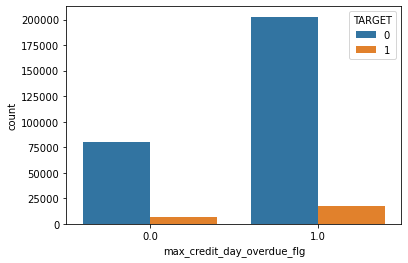

In [40]:
%matplotlib inline
sns.countplot(x='max_credit_day_overdue_flg', hue='TARGET', data=obj_tmp)
plt.legend(loc='upper right', title='TARGET')
plt.show()

### DAYS_CREDIT_ENDDATE|申し込み時点での他金融機関ローンの残りの日数

In [41]:
max(app_train['max_days_credit_enddate'])

31130.0

In [42]:
min(app_train['max_days_credit_enddate'])

-41920.0

In [43]:
obj_tmp = app_train[['TARGET', 'max_days_credit_enddate']].copy()
obj_tmp.corr()

,TARGET,max_days_credit_enddate
TARGET,1.000000,0.033534
max_days_credit_enddate,0.033534,1.000000


In [44]:
#%matplotlib inline
#sns.countplot(x='max_days_credit_enddate', hue='TARGET', data=app_train)
#plt.legend(loc='upper right', title='TARGET')
#plt.show()

### DAYS_ENDDATE_FACT(申し込み時点での他金融機関ローンが払い終わっている場合の払い終わってからの日数)

In [45]:
max(app_train['min_days_enddate_fact'])

0.0

In [46]:
min(app_train['min_days_enddate_fact'])

-42023.0

In [47]:
obj_tmp = app_train[['TARGET', 'min_days_enddate_fact']].copy()
obj_tmp.corr()

,TARGET,min_days_enddate_fact
TARGET,1.00000,0.06062
min_days_enddate_fact,0.06062,1.00000


In [48]:
#%matplotlib inline
#sns.countplot(x='min_days_enddate_fact', hue='TARGET', data=app_train)
#plt.legend(loc='upper right', title='TARGET')
#plt.show()

### max_amt_credit_max_overdue

In [49]:
max(app_train['max_amt_credit_max_overdue'])

94812246.0

In [50]:
min(app_train['max_amt_credit_max_overdue'])

0.0

In [51]:
app_train[['TARGET', 'max_amt_credit_max_overdue']].corr()

,TARGET,max_amt_credit_max_overdue
TARGET,1.000000,0.000052
max_amt_credit_max_overdue,0.000052,1.000000


### CNT_CREDIT_PROLONG(クレジットを何回延長したか)

In [52]:
max(app_train['cnt_credit_prolong'])

71.0

In [53]:
min(app_train['cnt_credit_prolong'])

1.0

In [54]:
app_train[['TARGET', 'cnt_credit_prolong']].corr()

,TARGET,cnt_credit_prolong
TARGET,1.000000,0.005423
cnt_credit_prolong,0.005423,1.000000


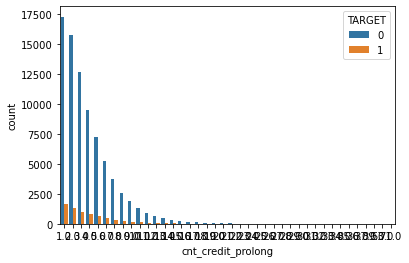

In [55]:
%matplotlib inline
sns.countplot(x='cnt_credit_prolong', hue='TARGET', data=app_train)
plt.legend(loc='upper right', title='TARGET')
plt.show()

### max_credit_prolong

In [56]:
max(app_train['max_credit_prolong'])

6.0

In [57]:
min(app_train['max_credit_prolong'])

0.0

In [58]:
app_train[['TARGET', 'max_credit_prolong']].corr()

,TARGET,max_credit_prolong
TARGET,1.000000,0.005313
max_credit_prolong,0.005313,1.000000


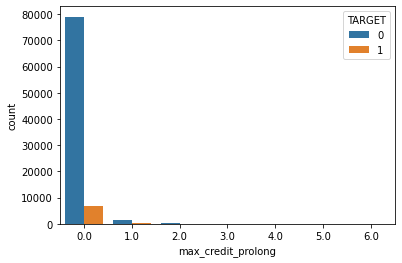

In [59]:
%matplotlib inline
sns.countplot(x='max_credit_prolong', hue='TARGET', data=app_train)
plt.legend(loc='upper right', title='TARGET')
plt.show()

### AMT_CREDIT_SUM(信用情報機関登録されている与信額の総和)

In [60]:
max(app_train['sum_amt_credit_sum'])

265320558.0

In [61]:
min(app_train['sum_amt_credit_sum'])

0.0

In [62]:
app_train[['TARGET', 'sum_amt_credit_sum']].corr()

,TARGET,sum_amt_credit_sum
TARGET,1.000000,-0.016928
sum_amt_credit_sum,-0.016928,1.000000


### AMT_CREDIT_SUM_DEBT(信用情報機関に登録されている債務)

In [63]:
max(app_train['sum_amt_credit_sum_debt'])

170466131.205

In [64]:
min(app_train['sum_amt_credit_sum_debt'])

-1999478.475

In [65]:
app_train[['TARGET', 'sum_amt_credit_sum_debt']].corr()

,TARGET,sum_amt_credit_sum_debt
TARGET,1.000000,0.007136
sum_amt_credit_sum_debt,0.007136,1.000000


### AMT_CREDIT_SUM_LIMIT(信用情報機関に登録されているクレジットカードの限度額)

In [66]:
max(app_train['sum_amt_credit_sum_limit'])

4500000.0

In [67]:
min(app_train['sum_amt_credit_sum_limit'])

-117660.015

In [68]:
app_train[['TARGET', 'sum_amt_credit_sum_limit']].corr()

,TARGET,sum_amt_credit_sum_limit
TARGET,1.000000,-0.012941
sum_amt_credit_sum_limit,-0.012941,1.000000


### AMT_CREDIT_SUM_OVERDUE(信用情報機関に登録されているクレジットカードの残高(使用額))

In [69]:
max(app_train['sum_amt_credit_sum_overdue'])

1982562.12

In [70]:
min(app_train['sum_amt_credit_sum_overdue'])

0.0

In [71]:
app_train[['TARGET', 'sum_amt_credit_sum_overdue']].corr()

,TARGET,sum_amt_credit_sum_overdue
TARGET,1.000000,0.009505
sum_amt_credit_sum_overdue,0.009505,1.000000


### CREDIT_TYPE(クレジットカードの種類)

In [72]:
values = ['Consumer credit', 'Credit card', 'Car loan', 'Mortgage', 'Microloan', 'Loan for business development', 'Another type of loan', 'Loan for working capital replenishment', 'Unknown type of loan', 'Cash loan (non-earmarked)', 'Real estate loan', 'Loan for the purchase of equipment']
app_train['credit_type'].replace(values, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)
app_test['credit_type'].replace(values, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)
app_train['credit_type'].value_counts()

1.0     61503
2.0     22566
3.0      1619
4.0      1317
5.0       664
6.0        67
7.0        39
8.0        38
9.0        12
10.0        4
Name: credit_type, dtype: int64

In [73]:
app_test['credit_type'].value_counts()

1.0     30227
2.0      9937
3.0       783
4.0       606
5.0       334
6.0        52
7.0        25
8.0        19
9.0        11
10.0        3
11.0        2
12.0        1
Name: credit_type, dtype: int64

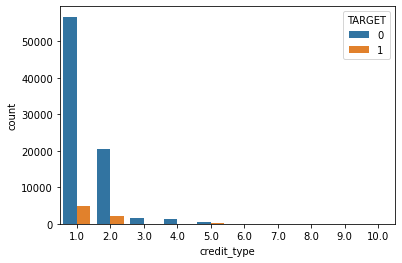

In [74]:
%matplotlib inline
sns.countplot(x='credit_type', hue='TARGET', data=app_train)
plt.legend(loc='upper right', title='TARGET')
plt.show()

### DAYS_CREDIT_UPDATE(申し込み日から、信用情報機関に最後に情報が登録された日までの日数)

In [75]:
app_train['max_days_credit_update'].value_counts()

-7.0       3833
-8.0       3736
-6.0       3568
-9.0       3249
-5.0       3085
           ... 
-2708.0       1
-2397.0       1
-2426.0       1
-2513.0       1
-1452.0       1
Name: max_days_credit_update, Length: 2088, dtype: int64

### AMT_ANNUITY(登録されているローン支払い額)

In [76]:
max(app_train['sum_amt_annuity'])

68493591.0

In [77]:
min(app_train['sum_amt_annuity'])

0.0

In [78]:
app_train[['TARGET', 'sum_amt_annuity']].corr()

,TARGET,sum_amt_annuity
TARGET,1.00000,0.00429
sum_amt_annuity,0.00429,1.00000


### hist_max_credit_day_overdue

In [79]:
max(app_train['hist_max_credit_day_overdue'])

2792

In [80]:
min(app_train['hist_max_credit_day_overdue'])

0

In [81]:
app_train[['TARGET', 'hist_max_credit_day_overdue']].corr()

,TARGET,hist_max_credit_day_overdue
TARGET,1.00000,0.00436
hist_max_credit_day_overdue,0.00436,1.00000


### hist_cnt_credit_day_overdue

In [82]:
max(app_train['hist_cnt_credit_day_overdue'])

2657

In [83]:
min(app_train['hist_cnt_credit_day_overdue'])

0

In [84]:
app_train[['TARGET', 'hist_cnt_credit_day_overdue']].corr()

,TARGET,hist_cnt_credit_day_overdue
TARGET,1.000000,-0.018182
hist_cnt_credit_day_overdue,-0.018182,1.000000


### hist_sum_credit_day_overdue

In [85]:
max(app_train['hist_sum_credit_day_overdue'])

268032

In [86]:
min(app_train['hist_sum_credit_day_overdue'])

0

In [87]:
app_train[['TARGET', 'hist_sum_credit_day_overdue']].corr()

,TARGET,hist_sum_credit_day_overdue
TARGET,1.000000,-0.000762
hist_sum_credit_day_overdue,-0.000762,1.000000


### hist_max_credit_prolong

In [88]:
max(app_train['hist_max_credit_prolong'])

9

In [89]:
min(app_train['hist_max_credit_prolong'])

0

In [90]:
app_train[['TARGET', 'hist_max_credit_prolong']].corr()

,TARGET,hist_max_credit_prolong
TARGET,1.00000,0.00165
hist_max_credit_prolong,0.00165,1.00000


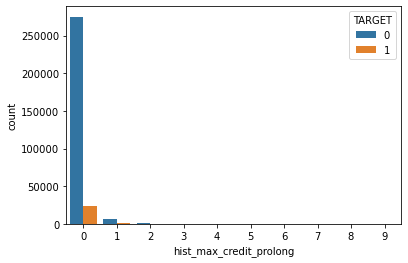

In [91]:
%matplotlib inline
sns.countplot(x='hist_max_credit_prolong', hue='TARGET', data=app_train)
plt.legend(loc='upper right', title='TARGET')
plt.show()

### hist_cnt_credit_prolong

In [92]:
max(app_train['hist_cnt_credit_prolong'])

2657

In [93]:
min(app_train['hist_cnt_credit_prolong'])

0

In [94]:
app_train[['TARGET', 'hist_cnt_credit_prolong']].corr()

,TARGET,hist_cnt_credit_prolong
TARGET,1.000000,-0.018182
hist_cnt_credit_prolong,-0.018182,1.000000


In [95]:
#%matplotlib inline
#sns.countplot(x='hist_cnt_credit_prolong', hue='TARGET', data=app_train)
#plt.legend(loc='upper right', title='TARGET')
#plt.show()

### hist_sum_credit_prolong

In [96]:
max(app_train['hist_sum_credit_prolong'])

558

In [97]:
min(app_train['hist_sum_credit_prolong'])

0

In [98]:
app_train[['TARGET', 'hist_sum_credit_prolong']].corr()

,TARGET,hist_sum_credit_prolong
TARGET,1.000000,-0.002264
hist_sum_credit_prolong,-0.002264,1.000000


In [99]:
#%matplotlib inline
#sns.countplot(x='hist_sum_credit_prolong', hue='TARGET', data=app_train)
#plt.legend(loc='upper right', title='TARGET')
#plt.show()

### hist_max_amt_credit_max_overdue

In [100]:
max(app_train['hist_max_amt_credit_max_overdue'])

115987185.0

In [101]:
min(app_train['hist_max_amt_credit_max_overdue'])

0.0

In [102]:
app_train[['TARGET', 'hist_max_amt_credit_max_overdue']].corr()

,TARGET,hist_max_amt_credit_max_overdue
TARGET,1.000000,0.001772
hist_max_amt_credit_max_overdue,0.001772,1.000000


### hist_cnt_amt_credit_max_overdue

In [103]:
max(app_train['hist_cnt_amt_credit_max_overdue'])

858

In [104]:
min(app_train['hist_cnt_amt_credit_max_overdue'])

0

In [105]:
app_train[['TARGET', 'hist_cnt_amt_credit_max_overdue']].corr()

,TARGET,hist_cnt_amt_credit_max_overdue
TARGET,1.000000,-0.010286
hist_cnt_amt_credit_max_overdue,-0.010286,1.000000


In [106]:
#%matplotlib inline
#sns.countplot(x='hist_cnt_amt_credit_max_overdue', hue='TARGET', data=app_train)
#plt.legend(loc='upper right', title='TARGET')
#plt.show()

### hist_sum_amt_credit_max_overdue

In [107]:
max(app_train['hist_sum_amt_credit_max_overdue'])

8153853156.0

In [108]:
min(app_train['hist_sum_amt_credit_max_overdue'])

0.0

In [109]:
app_train[['TARGET', 'hist_sum_amt_credit_max_overdue']].corr()

,TARGET,hist_sum_amt_credit_max_overdue
TARGET,1.000000,-0.000233
hist_sum_amt_credit_max_overdue,-0.000233,1.000000


### 債務件数

In [110]:
# 集計処理
previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns={'SK_ID_BUREAU': 'previous_loan_counts'})

In [111]:
# trainへマージ
app_train = pd.merge(app_train, previous_loan_counts, on='SK_ID_CURR', how='left')
app_train['previous_loan_counts'].fillna(0, inplace=True)
# testへマージ
app_test = pd.merge(app_test, previous_loan_counts, on='SK_ID_CURR', how='left')
app_test['previous_loan_counts'].fillna(0, inplace=True)

In [112]:
# trainへフラグを設定
app_train.loc[app_train['previous_loan_counts'] == 0, 'previous_loan_flg'] = 0
app_train.loc[app_train['previous_loan_counts'] != 0, 'previous_loan_flg'] = 1
# testへフラグを設定
app_test.loc[app_test['previous_loan_counts'] == 0, 'previous_loan_flg'] = 0
app_test.loc[app_test['previous_loan_counts'] != 0, 'previous_loan_flg'] = 1

# dummy列を削除
#delete_columns = ['CODE_GENDER']
#app_train_br_pr_loan_counts.drop(delete_columns, axis=1, inplace=True)
#app_test_br_pr_loan_counts.drop(delete_columns, axis=1, inplace=True)

app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,hist_cnt_credit_prolong,hist_sum_credit_prolong,hist_max_amt_credit_max_overdue,hist_cnt_amt_credit_max_overdue,hist_sum_amt_credit_max_overdue,debt_credit_ratio_none,debt_credit_ratio_none_flg,max_credit_day_overdue_flg,previous_loan_counts,previous_loan_flg
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,110,0,5043.645,56,73472.58,0.320947,1,0.0,8.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,4,0,0.000,4,0.00,0.000000,0,1.0,4.0,1.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,2,0,0.000,1,0.00,0.000000,0,1.0,2.0,1.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0.000,0,0.00,0.000000,0,1.0,0.0,0.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,1,0,0.000,1,0.00,0.000000,0,1.0,1.0,1.0


In [113]:
app_train.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
debt_credit_ratio_none        0
debt_credit_ratio_none_flg    0
max_credit_day_overdue_flg    0
previous_loan_counts          0
previous_loan_flg             0
Length: 154, dtype: int64

In [114]:
len(app_train)

307511

In [115]:
# previous_loan_countsを分割し値をビンの代表値へ置き換え
#app_train_br_pr_loan_counts['previous_loan_counts'] = app_train_br_pr_loan_counts['previous_loan_counts'].apply(lambda x : previous_loan_counts(x))
#app_test_br_pr_loan_counts['previous_loan_counts'] = app_test_br_pr_loan_counts['previous_loan_counts'].apply(lambda x : previous_loan_counts(x))
#app_train_br_pr_loan_counts['previous_loan_counts']

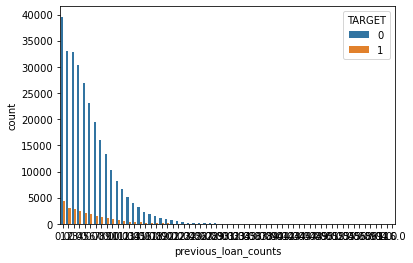

In [116]:
%matplotlib inline
sns.countplot(x='previous_loan_counts', hue='TARGET', data=app_train)
plt.legend(loc='upper right', title='TARGET')
plt.show()

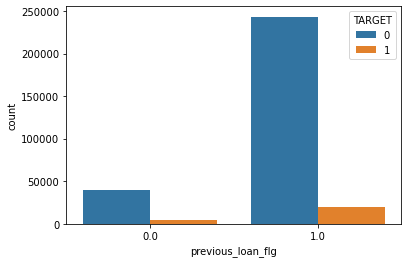

In [117]:
%matplotlib inline
sns.countplot(x='previous_loan_flg', hue='TARGET', data=app_train)
plt.legend(loc='upper right', title='TARGET')
plt.show()

In [118]:
app_train[['TARGET', 'previous_loan_flg']].corr()

,TARGET,previous_loan_flg
TARGET,1.000000,-0.030789
previous_loan_flg,-0.030789,1.000000


In [119]:
app_train[['TARGET', 'previous_loan_counts']].corr()

,TARGET,previous_loan_counts
TARGET,1.00000,-0.01002
previous_loan_counts,-0.01002,1.00000


### 他社遅延日数の集計

## モデルを適用

In [120]:
delete_columns = ['DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR','NAME_TYPE_SUITE','OWN_CAR_AGE']
app_train.drop(delete_columns, axis=1, inplace=True)
app_test.drop(delete_columns, axis=1, inplace=True)
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,hist_cnt_credit_prolong,hist_sum_credit_prolong,hist_max_amt_credit_max_overdue,hist_cnt_amt_credit_max_overdue,hist_sum_amt_credit_max_overdue,debt_credit_ratio_none,debt_credit_ratio_none_flg,max_credit_day_overdue_flg,previous_loan_counts,previous_loan_flg
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,110,0,5043.645,56,73472.58,0.320947,1,0.0,8.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,4,0,0.000,4,0.00,0.000000,0,1.0,4.0,1.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,2,0,0.000,1,0.00,0.000000,0,1.0,2.0,1.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0.000,0,0.00,0.000000,0,1.0,0.0,0.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,1,0,0.000,1,0.00,0.000000,0,1.0,1.0,1.0


In [121]:
columns = list(app_train.columns)
columns.remove('SK_ID_CURR')
columns.remove('TARGET')
#columns

In [122]:
#test_columns = list(app_test.columns)
#test_columns.remove('SK_ID_CURR')
#test_columns

In [123]:
app_train['NAME_CONTRACT_TYPE'].value_counts()
app_train['CODE_GENDER'].value_counts()
app_train['FLAG_OWN_CAR'].value_counts()
app_train['FLAG_OWN_REALTY'].value_counts()
app_train['CNT_CHILDREN'].value_counts()
app_train['AMT_INCOME_TOTAL'].value_counts()
app_train['AMT_CREDIT'].value_counts()
app_train['AMT_ANNUITY'].value_counts()
app_train['AMT_GOODS_PRICE'].value_counts()
app_train['NAME_INCOME_TYPE'].value_counts()
app_train['NAME_EDUCATION_TYPE'].value_counts()
app_train['NAME_FAMILY_STATUS'].value_counts()
app_train['NAME_HOUSING_TYPE'].value_counts()
app_train['REGION_POPULATION_RELATIVE'].value_counts()
app_train['DAYS_BIRTH'].value_counts()
app_train['DAYS_EMPLOYED'].value_counts()
app_train['OCCUPATION_TYPE'].value_counts()
app_train['CNT_FAM_MEMBERS'].value_counts()
app_train['REGION_RATING_CLIENT'].value_counts()
app_train['REGION_RATING_CLIENT_W_CITY'].value_counts()
app_train['EXT_SOURCE_1'].value_counts()
app_train['EXT_SOURCE_2'].value_counts()
app_train['EXT_SOURCE_3'].value_counts()
app_train['credit_annuity_ratio'].value_counts()
app_train['sk_id_bureau'].value_counts()
app_train['max_credit_day_overdue'].value_counts()
app_train['max_days_credit_enddate'].value_counts()
app_train['min_days_enddate_fact'].value_counts()
app_train['max_amt_credit_max_overdue'].value_counts()
app_train['cnt_credit_prolong'].value_counts()
app_train['max_credit_prolong'].value_counts()
app_train['sum_amt_credit_sum'].value_counts()
app_train['sum_amt_credit_sum_debt'].value_counts()
app_train['sum_amt_credit_sum_limit'].value_counts()
app_train['sum_amt_credit_sum_overdue'].value_counts()
app_train['credit_type'].value_counts()
#app_train['max_days_credit_update'].value_counts()
#app_train['sum_amt_annuity'].value_counts()
#app_train['hist_max_credit_day_overdue'].value_counts()
#app_train['hist_cnt_credit_day_overdue'].value_counts()
#app_train['hist_sum_credit_day_overdue'].value_counts()
#app_train['hist_max_credit_prolong'].value_counts()
#app_train['hist_cnt_credit_prolong'].value_counts()
#app_train['hist_sum_credit_prolong'].value_counts()
#app_train['hist_max_amt_credit_max_overdue'].value_counts()
#app_train['hist_cnt_amt_credit_max_overdue'].value_counts()
#app_train['hist_sum_amt_credit_max_overdue'].value_counts()
#app_train['max_credit_day_overdue_flg'].value_counts()
#app_train['previous_loan_counts'].value_counts()
#app_train['previous_loan_flg'].value_counts()

1.0     61503
2.0     22566
3.0      1619
4.0      1317
5.0       664
6.0        67
7.0        39
8.0        38
9.0        12
10.0        4
Name: credit_type, dtype: int64

In [124]:
# カテゴリ変数の変換
#cat_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'OCCUPATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'credit_type']
# 
#alt_x = pd.concat([app_train, app_test])
#alt_x = pd.get_dummies(alt_x, columns=cat_cols)

#
#app_train = alt_x.iloc[:app_train.shape[0], :].reset_index(drop=True)
#app_test = alt_x.iloc[app_train.shape[0]:, :].reset_index(drop=True)

In [125]:
#num_cols = ['max_credit_day_overdue', 'max_days_credit_enddate', 'min_days_enddate_fact', 'max_amt_credit_max_overdue', 'cnt_credit_prolong_in_6month', 'sum_amt_credit_sum', 'sum_amt_credit_sum_debt', 'sum_amt_credit_sum_limit', 'sum_amt_credit_sum_overdue', 'avg_amt_annuity']

data = pd.concat([app_train, app_test], sort=False)
train = data[:len(app_train)]
test = data[len(app_test):]


y_train = train['TARGET']
X_train = app_train.copy().drop('TARGET', axis=1)
X_test = app_test.copy()

# 学習データに基づいてYao-Johnson変換を定義
#pt = PowerTransformer(method = 'yeo-johnson')
#pt.fit(X_train[num_cols])

# 変換後のデータで各列を置換
#X_train[num_cols] = pt.transform(X_train[num_cols])
#X_test[num_cols] = pt.transform(X_test[num_cols])

X_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,hist_cnt_credit_prolong,hist_sum_credit_prolong,hist_max_amt_credit_max_overdue,hist_cnt_amt_credit_max_overdue,hist_sum_amt_credit_max_overdue,debt_credit_ratio_none,debt_credit_ratio_none_flg,max_credit_day_overdue_flg,previous_loan_counts,previous_loan_flg
0,100002,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,...,110,0,5043.645,56,73472.58,0.320947,1,0.0,8.0,1.0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,4,0,0.000,4,0.00,0.000000,0,1.0,4.0,1.0
2,100004,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,2,0,0.000,1,0.00,0.000000,0,1.0,2.0,1.0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0.000,0,0.00,0.000000,0,1.0,0.0,0.0
4,100007,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,...,1,0,0.000,1,0.00,0.000000,0,1.0,1.0,1.0


In [126]:
X_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,hist_cnt_credit_prolong,hist_sum_credit_prolong,hist_max_amt_credit_max_overdue,hist_cnt_amt_credit_max_overdue,hist_sum_amt_credit_max_overdue,debt_credit_ratio_none,debt_credit_ratio_none_flg,max_credit_day_overdue_flg,previous_loan_counts,previous_loan_flg
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,172,0,0.0,0,0.0,0.147934,1,0.0,7.0,1.0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,21,0,0.0,3,0.0,0.755662,1,0.0,3.0,1.0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,230,0,19305.0,66,1274130.0,0.000000,0,0.0,4.0,1.0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,560,0,0.0,128,0.0,0.038443,1,0.0,12.0,1.0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0.0,0,0.0,0.000000,0,1.0,0.0,0.0


In [127]:
import xgboost as xgb
from sklearn.metrics import log_loss

y_preds = []
models = []
scores = []
oof_train = np.zeros((len(X_train),))
cv = KFold(n_splits=5, shuffle=True, random_state=0)

categorical_features = columns

params = {
    'objective': 'binary:logistic'
    ,'silent': 1
    ,'random_state': 17
    ,'gpu_id': 0
    ,'tree_method': 'gpu_hist'
}

num_round = 50

for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index, :]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train[train_index]
    y_val = y_train[valid_index]
    
    dtrain = xgb.DMatrix(X_tr, label=y_tr)
    dvalid = xgb.DMatrix(X_val, label=y_val)
    dtest = xgb.DMatrix(X_test)
    
    watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
    model = xgb.train(params, dtrain, num_round, evals=watchlist)
    
    va_pred = model.predict(dvalid)
    score = log_loss(y_val, va_pred)
    oof_train[valid_index] = va_pred
    
    y_pred = model.predict(dtest) 
    
    
    #oof_train[valid_index] = model.predict(X_val, num_iteration=model.best_iteration)
    #y_pred = model.predict(X_test, num_iteration=model.best_iteration)##

    y_preds.append(y_pred)
    models.append(model)
    scores.append(score)

[20:40:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-logloss:0.50904	eval-logloss:0.50840
[1]	train-logloss:0.40970	eval-logloss:0.40877
[2]	train-logloss:0.35032	eval-logloss:0.34926
[3]	train-logloss:0.31339	eval-logloss:0.31220
[4]	train-logloss:0.28994	eval-logloss:0.28884
[5]	train-logloss:0.27483	eval-logloss:0.27376
[6]	train-logloss:0.26500	eval-logloss:0.26405
[7]	train-logloss:0.25865	eval-logloss:0.25793
[8]	train-logloss:0.25423	eval-logloss:0.25373
[9]	train-logloss:0.25122	eval-logloss:0.25115
[10]	train-logloss:0.24907	eval-logloss:0.24930
[11]	train-logloss:0.24701	eval-logloss:0.24762
[12]	train-logloss:

[46]	train-logloss:0.22600	eval-logloss:0.24639
[47]	train-logloss:0.22576	eval-logloss:0.24641
[48]	train-logloss:0.22568	eval-logloss:0.24643
[49]	train-logloss:0.22529	eval-logloss:0.24632
[20:40:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-logloss:0.50860	eval-logloss:0.50958
[1]	train-logloss:0.40902	eval-logloss:0.41060
[2]	train-logloss:0.34949	eval-logloss:0.35176
[3]	train-logloss:0.31245	eval-logloss:0.31526
[4]	train-logloss:0.28884	eval-logloss:0.29213
[5]	train-logloss:0.27369	eval-logloss:0.27764
[6]	train-logloss:0.26382	eval-logloss:0.26837
[7]	train-logloss:0.25731	eval-logloss:0.26234
[8]	train-logloss

In [128]:
y_pred

array([0.07882938, 0.03449596, 0.02811692, ..., 0.01828944, 0.01285806,
       0.15288727], dtype=float32)

In [129]:
scores

[0.24190331355525105,
 0.24535231360578316,
 0.2463162983886201,
 0.24703251599489404,
 0.2468168204274567]

In [130]:
# CSV-00
submit_all = app_test[["SK_ID_CURR"]].copy()
# 予測確率の変数名はTARGET
submit_all["TARGET"] = y_preds[0]
submit_all.isnull().sum()

# Submit File
submit_all.to_csv(
    path_or_buf="./home-credit-default-risk/submit/submit_all_00.csv", # 出力先
    sep=",",                                            # 区切り文字
    index=False,                                        # indexの出力有無
    header=True                                        # headerの出力有無
)

In [131]:
# CSV-01
submit_all = app_test[["SK_ID_CURR"]].copy()
# 予測確率の変数名はTARGET
submit_all["TARGET"] = y_preds[1]

# Submit File
submit_all.to_csv(
    path_or_buf="./home-credit-default-risk/submit/submit_all_01.csv", # 出力先
    sep=",",                                            # 区切り文字
    index=False,                                        # indexの出力有無
    header=True                                        # headerの出力有無
)

In [132]:
# CSV-02
submit_all = app_test[["SK_ID_CURR"]].copy()
# 予測確率の変数名はTARGET
submit_all["TARGET"] = y_preds[2]

# Submit File
submit_all.to_csv(
    path_or_buf="./home-credit-default-risk/submit/submit_all_02.csv", # 出力先
    sep=",",                                            # 区切り文字
    index=False,                                        # indexの出力有無
    header=True                                        # headerの出力有無
)

In [133]:
# CSV-03
submit_all = app_test[["SK_ID_CURR"]].copy()
# 予測確率の変数名はTARGET
submit_all["TARGET"] = y_preds[3]

# Submit File
submit_all.to_csv(
    path_or_buf="./home-credit-default-risk/submit/submit_all_03.csv", # 出力先
    sep=",",                                            # 区切り文字
    index=False,                                        # indexの出力有無
    header=True                                        # headerの出力有無
)

In [134]:
# CSV-04
submit_all = app_test[["SK_ID_CURR"]].copy()
# 予測確率の変数名はTARGET
submit_all["TARGET"] = y_preds[4]

# Submit File
submit_all.to_csv(
    path_or_buf="./home-credit-default-risk/submit/submit_all_04.csv", # 出力先
    sep=",",                                            # 区切り文字
    index=False,                                        # indexの出力有無
    header=True                                        # headerの出力有無
)

In [135]:
submit_all_00 = pd.read_csv('./home-credit-default-risk/submit/submit_all_00.csv')
submit_all_01 = pd.read_csv('./home-credit-default-risk/submit/submit_all_01.csv')
submit_all_02 = pd.read_csv('./home-credit-default-risk/submit/submit_all_02.csv')
submit_all_03 = pd.read_csv('./home-credit-default-risk/submit/submit_all_03.csv')
submit_all_04 = pd.read_csv('./home-credit-default-risk/submit/submit_all_04.csv')

In [136]:
submit_all = pd.DataFrame({
    'submit_all_00': submit_all_00['TARGET'].values
    ,'submit_all_01': submit_all_01['TARGET'].values
    ,'submit_all_02': submit_all_02['TARGET'].values
    ,'submit_all_03': submit_all_03['TARGET'].values
    ,'submit_all_04': submit_all_04['TARGET'].values
    })
submit_all.head()

,submit_all_00,submit_all_01,submit_all_02,submit_all_03,submit_all_04
0,0.021344,0.032873,0.039209,0.055079,0.078829
1,0.066563,0.071810,0.138997,0.077096,0.034496
2,0.099015,0.033426,0.015723,0.039690,0.028117
3,0.016440,0.016010,0.010061,0.014236,0.033641
4,0.112599,0.113503,0.097573,0.088630,0.096009


In [137]:
submit_all.corr()

,submit_all_00,submit_all_01,submit_all_02,submit_all_03,submit_all_04
submit_all_00,1.000000,0.754094,0.774107,0.770938,0.753143
submit_all_01,0.754094,1.000000,0.756916,0.766009,0.752565
submit_all_02,0.774107,0.756916,1.000000,0.775524,0.751533
submit_all_03,0.770938,0.766009,0.775524,1.000000,0.778299
submit_all_04,0.753143,0.752565,0.751533,0.778299,1.000000


In [138]:
submit_all = app_test[["SK_ID_CURR"]].copy()
submit_all['TARGET'] = (submit_all_00['TARGET'] + submit_all_01['TARGET'] + submit_all_02['TARGET'] + submit_all_03['TARGET'] + submit_all_04['TARGET'])/5
submit_all.head()

,SK_ID_CURR,TARGET
0,100001,0.045467
1,100005,0.077792
2,100013,0.043194
3,100028,0.018078
4,100038,0.101663


In [139]:
submit_all['TARGET'] = (submit_all['TARGET'] / 5)
submit_all.to_csv('./home-credit-default-risk/submit/submit_br_main_test.csv', index=False)
submit_all.head()

,SK_ID_CURR,TARGET
0,100001,0.009093
1,100005,0.015558
2,100013,0.008639
3,100028,0.003616
4,100038,0.020333


In [140]:
submit_all.count()

SK_ID_CURR    48744
TARGET        48744
dtype: int64